In [1]:

# Set up notebook
%pprint
import sys
if (osp.join(os.pardir, 'py') not in sys.path): sys.path.insert(1, osp.join(os.pardir, 'py'))

Pretty printing has been turned OFF


In [2]:

# load libraries
from FRVRS import (nu, fu, display)
from pandas import get_dummies
from re import split, search, sub, MULTILINE
from scipy.stats import f_oneway, ttest_ind, kruskal, norm
import itertools

In [3]:

# load data frames
data_frames_dict = nu.load_data_frames(
    verbose=True, metrics_evaluation_open_world_scene_stats_df=''
)
scene_stats_df = data_frames_dict['metrics_evaluation_open_world_scene_stats_df'].copy()

No pickle exists for metrics_evaluation_open_world_scene_stats_df - attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/csv/metrics_evaluation_open_world_scene_stats_df.csv.


In [4]:

# Calculate percentages and treatment counts
scene_stats_df['percent_injury_correctly_treated'] = (
    100 * scene_stats_df.injury_correctly_treated_count / scene_stats_df.all_patient_injuries_count
)
scene_stats_df['injury_treatments_count'] = (
    scene_stats_df.all_patient_injuries_count - scene_stats_df.injury_not_treated_count
)

# Define the columns list
columns_list = [
    'percent_injury_correctly_treated',
    'injury_treatments_count',
    'pulse_taken_count',
    'time_to_hemorrhage_control_per_patient',
    'triage_time',
    'patient_count',
    'teleport_count',
]

# Get statistics using pandas
df = nu.get_statistics(scene_stats_df, columns_list).T

# Calculate range and IQR
df['range'] = df['max'] - df['min']
df['IQR'] = df['75%'] - df['25%']

# Define the index list
index_list = ['min', 'max', 'range', 'median', 'IQR']

# Set formatting to prevent scientific notation (assuming numeric columns)
df = df[index_list].applymap('{:.4f}'.format)  # Format as floats with 4 decimals

df['null_count'] = df.index.map(lambda column_name: scene_stats_df[column_name].isnull().sum())

# Display the Data Frame subset
display(df)

,min,max,range,median,IQR,null_count
percent_injury_correctly_treated,0.0000,81.0811,81.0811,41.1538,29.3351,2
injury_treatments_count,0.0000,34.0000,34.0000,14.0000,9.5000,0
pulse_taken_count,0.0000,61.0000,61.0000,19.5000,23.2500,0
time_to_hemorrhage_control_per_patient,0.0000,74591.5000,74591.5000,7325.5000,17421.0000,2
triage_time,19844.0000,1742766.0000,1722922.0000,887696.0000,434859.7500,0
patient_count,9.0000,16.0000,7.0000,12.0000,4.0000,0
teleport_count,1.0000,172.0000,171.0000,62.0000,47.7500,0



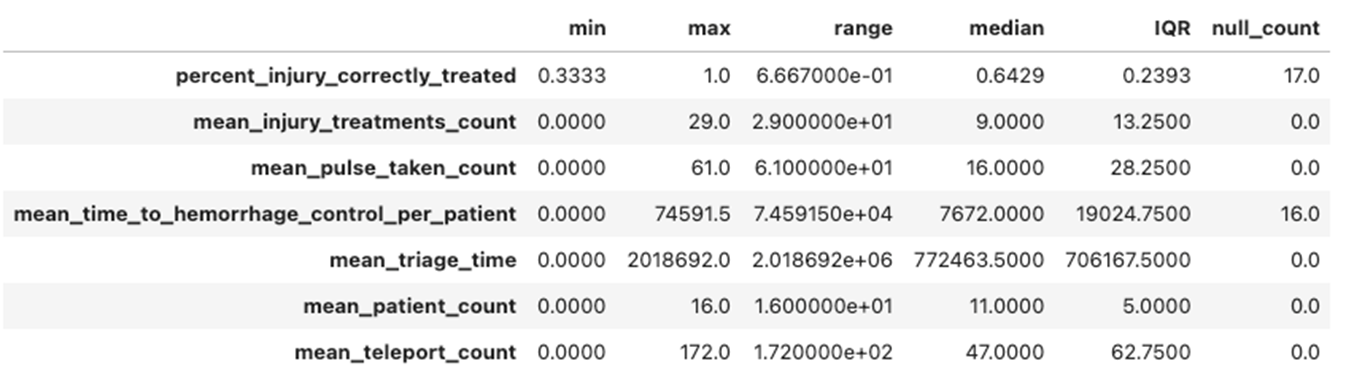